### Import the Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import periodogram

## Finding the period of bright pulses

### Load the data

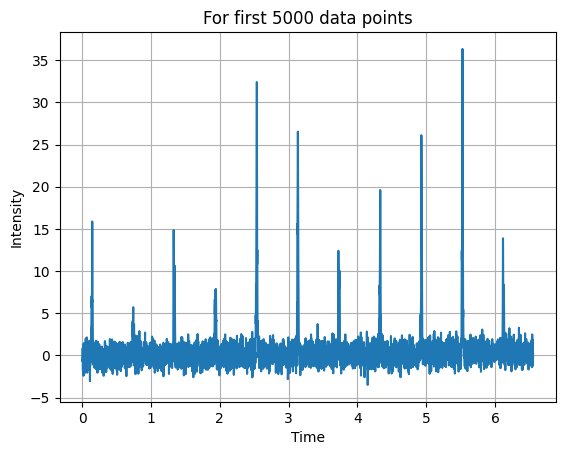

In [2]:
data = pd.read_csv('a1844d141p64.ascii', sep=r'\s+' , header=None, names=['time', 'intensity'])

# Take first 5000 data points 
time = data['time'][:5000]
intensity = data['intensity'][:5000]
plt.plot(time, intensity)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('For first 5000 data points')
plt.grid(True)
plt.show()

### Filtering the noise (Manually)

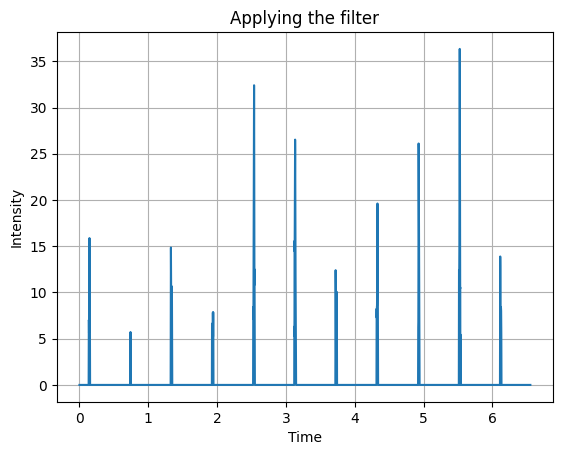

In [3]:
f_intensity = np.where(intensity < 5, 0, intensity) # manually adjusted the filtering strength by looking at the plot
plt.plot(time, f_intensity)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Applying the filter')
plt.grid(True)
plt.show()

### Plotting Periodogram

The estimated period is 0.5957818181818182 seconds


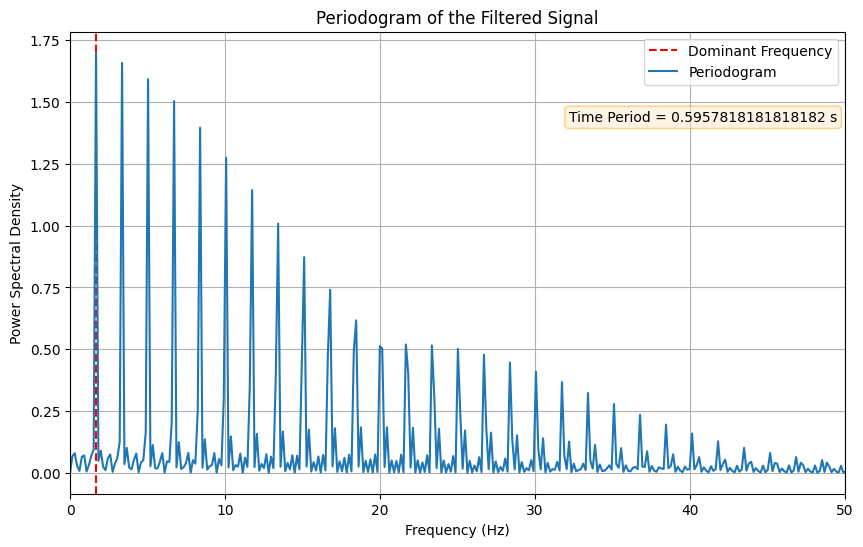

In [4]:
# Sampling frequency
fs = 1 / 0.00131072

# Making a periodogram
frequencies, power = periodogram(f_intensity, fs)

# Period calculation
i_max = np.argmax(np.abs(power))
dominant_freq = frequencies[i_max]
period = 1 / dominant_freq
print(f'The estimated period is {period} seconds')

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.axvline(x=dominant_freq, color='r', linestyle = '--', label='Dominant Frequency')
plt.plot(frequencies, power, label='Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the Filtered Signal')
plt.xlim(0, 50)
plt.legend()
text = (f'Time Period = {period} s')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
plt.text(0.99, 0.83, text, fontsize=10, bbox=bbox, horizontalalignment='right',
         verticalalignment='top', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()